### This notebook contains codes for the Scientific Data Engineer Challenge of Exscientia that I found online.

In this notebook, I've created the codes for what has been asked in the challenge pdf file. This notebook only contains the data science porsion of the challenge.

many thanks to Oxford Protein Informatics Group for sharing valuable codes and explanations!

visit: https://www.blopig.com/blog/

#### 1. import the libraries:

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import math 
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, rdRGroupDecomposition, AssignStereochemistry
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Descriptors import MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors, MaxPartialCharge, MinPartialCharge,NumRotatableBonds
from rdkit.Chem import PandasTools

####  2. read the .sdf file:

In [2]:
SDFFile = "Drugs.sdf"
df = PandasTools.LoadSDF(SDFFile, smilesName='SMILES', molColName='Molecule')
df

,CAS number,chemical name,name IUPAC,merck index ref,literature ref,patent date,Launched date,FDA approved,code ATC,solubility,...,Synonyms,T max,protein binding rate,bioavailability,half life time,absorption rate,distribution volume,ID,SMILES,Molecule
0,134-58-7,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol","MI, 12, 928",Cancer Res. 1975 Oct 35(10):2872-8,08.09.1964,,,Not yet attributed,DMSO,...,,,,,,,,Compound 1,Nc1nc2[nH]nnc2c(=O)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94562e0>
1,57-67-0,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,"MI, 13, 8993",Contact Dermatitis. 2002 Mar 46(3):186-7,23.05.1950,,,A07AB03,DMSO,...,,,,,,,,Compound 2,N=C(N)NS(=O)(=O)c1ccc(N)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456350>
2,31430-18-9,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,Mol Cancer Ther. 2011 Oct 10(10):1886-96,10.06.1983,,,Not yet attributed,DMSO 10mg/mL,...,,,,,,,,Compound 3,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9402cf0>
3,992-21-2,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,"MI, 13, 5648",Eur J Dermatol. 2003 Mar-Apr 13(2):130-5,24.02.1982,1992,,J01AA04,,...,,3 - 4,,,8 - 10,,,Compound 4,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94563c0>
4,23930-37-2,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...","MI, 13, 231",Anesthesiology. 1979 Apr 50(4):350-2,09.09.1987,Phase I,,Not yet attributed,,...,,,,,,,,Compound 5,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f20>
5,23930-19-0,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...","MI, 13, 233",Mol Pharmacol. 1980 Jul 18(1):144-7,09.09.1987,,,N01AX05,,...,,,,,,,,Compound 6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f90>
6,13539-59-8,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...","MI, 13, 733",Curr Med Res Opin. 1976 4(1):3-16,24.10.1967,1970,,M01AX04,,...,,,,,,,,Compound 7,CCC[C@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471040>
7,59263-76-2,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,"MI, 13, 5888",Drugs. 1985 Oct 30(4):285-312,09.04.1970,1983,,N02AX05,,...,,0.4 - 1,,,,,,Compound 8,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471120>
8,37321-09-8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...","MI, 13, 757",Vet Q. 2001 Apr 23(2):62-6,08.04.1975,1980,,QJ01GB90,,...,,,,,,0 - 5,,Compound 9,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471190>
9,2105-43-3,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,"MI, 13, 4332",Med Sci Monit. 2004 Sep 10(9):RA199-203,11.10.1966,,,Not yet attributed,,...,,,,,,,,Compound 10,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471270>


it's always good to check what type of dataframe we have:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CAS number               10 non-null     object
 1   chemical name            10 non-null     object
 2   name IUPAC               10 non-null     object
 3   merck index ref          10 non-null     object
 4   literature ref           10 non-null     object
 5   patent date              10 non-null     object
 6   Launched date            10 non-null     object
 7   FDA approved             10 non-null     object
 8   code ATC                 10 non-null     object
 9   solubility               10 non-null     object
 10  Additional info type     10 non-null     object
 11  Additional info detail   10 non-null     object
 12  blood brain barrier      10 non-null     object
 13  administration           10 non-null     object
 14  absorption tissue        10 non-null     obje

####  3. Choosing descripters and creating new columns with the calculated properties:

In [4]:
chosen_descriptors = ['Molwt', 'MolLogP', 'NumAromaticRings', 'HBA', 'HBD', 
                      'MaxPartialCharge','MinPartialCharge', 'NumRotatableBonds']

mol_wt = []
mol_logp = []
num_arom_rings = []
num_hba = []
num_hbd = []
maxpartialch = []
minpartialch = []
num_rot_bonds = []


for mol in df["Molecule"]:
    mol_wt.append(MolWt(mol))
    mol_logp.append(MolLogP(mol))
    num_arom_rings.append(NumAromaticRings(mol))
    num_hba.append(NumHAcceptors(mol))
    num_hbd.append(NumHDonors(mol))
    maxpartialch.append(MaxPartialCharge(mol))
    minpartialch.append(MinPartialCharge(mol))
    num_rot_bonds.append(NumRotatableBonds(mol))

# Assigning values of these descriptors wrt to the column names defined
df[chosen_descriptors[0]] = mol_wt
df[chosen_descriptors[1]] = mol_logp
df[chosen_descriptors[2]] = num_arom_rings
df[chosen_descriptors[3]] = num_hba
df[chosen_descriptors[4]] = num_hbd
df[chosen_descriptors[5]] = maxpartialch 
df[chosen_descriptors[6]] = minpartialch 
df[chosen_descriptors[7]] = num_rot_bonds
df

,CAS number,chemical name,name IUPAC,merck index ref,literature ref,patent date,Launched date,FDA approved,code ATC,solubility,...,SMILES,Molecule,Molwt,MolLogP,NumAromaticRings,HBA,HBD,MaxPartialCharge,MinPartialCharge,NumRotatableBonds
0,134-58-7,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol","MI, 12, 928",Cancer Res. 1975 Oct 35(10):2872-8,08.09.1964,,,Not yet attributed,DMSO,...,Nc1nc2[nH]nnc2c(=O)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94562e0>,152.117,-1.37660,2,5,3,0.281974,-0.369251,0
1,57-67-0,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,"MI, 13, 8993",Contact Dermatitis. 2002 Mar 46(3):186-7,23.05.1950,,,A07AB03,DMSO,...,N=C(N)NS(=O)(=O)c1ccc(N)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456350>,214.250,-0.55943,1,4,4,0.263641,-0.398728,2
2,31430-18-9,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,Mol Cancer Ther. 2011 Oct 10(10):1886-96,10.06.1983,,,Not yet attributed,DMSO 10mg/mL,...,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9402cf0>,301.327,3.03370,3,5,2,0.413190,-0.452572,3
3,992-21-2,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,"MI, 13, 5648",Eur J Dermatol. 2003 Mar-Apr 13(2):130-5,24.02.1982,1992,,J01AA04,,...,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94563c0>,602.641,-0.45420,1,12,9,0.320245,-0.509650,10
4,23930-37-2,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...","MI, 13, 231",Anesthesiology. 1979 Apr 50(4):350-2,09.09.1987,Phase I,,Not yet attributed,,...,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f20>,390.520,3.31740,0,5,1,0.302564,-0.457860,3
5,23930-19-0,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...","MI, 13, 233",Mol Pharmacol. 1980 Jul 18(1):144-7,09.09.1987,,,N01AX05,,...,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f90>,332.484,3.77420,0,3,1,0.136897,-0.393120,1
6,13539-59-8,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...","MI, 13, 733",Curr Med Res Opin. 1976 4(1):3-16,24.10.1967,1970,,M01AX04,,...,CCC[C@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471040>,300.362,2.06422,1,4,0,0.261007,-0.346837,2
7,59263-76-2,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,"MI, 13, 5888",Drugs. 1985 Oct 30(4):285-312,09.04.1970,1983,,N02AX05,,...,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471120>,269.816,3.57750,1,2,1,0.115372,-0.507956,2
8,37321-09-8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...","MI, 13, 757",Vet Q. 2001 Apr 23(2):62-6,08.04.1975,1980,,QJ01GB90,,...,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471190>,539.583,-6.94930,0,16,11,0.189171,-0.393609,6
9,2105-43-3,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,"MI, 13, 4332",Med Sci Monit. 2004 Sep 10(9):RA199-203,11.10.1966,,,Not yet attributed,,...,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471270>,435.015,2.92172,1,8,2,0.213710,-0.396010,10


In [5]:
new_df = pd.DataFrame()
new_df = df.drop(['CAS number', 'merck index ref', 'literature ref', 'patent date', 'ID'], axis=1)
new_df

,chemical name,name IUPAC,Launched date,FDA approved,code ATC,solubility,Additional info type,Additional info detail,blood brain barrier,administration,...,SMILES,Molecule,Molwt,MolLogP,NumAromaticRings,HBA,HBD,MaxPartialCharge,MinPartialCharge,NumRotatableBonds
0,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol",,,Not yet attributed,DMSO,Pharmacological tool,,,,...,Nc1nc2[nH]nnc2c(=O)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94562e0>,152.117,-1.37660,2,5,3,0.281974,-0.369251,0
1,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,,,A07AB03,DMSO,Chemical classification (according ATC code),Sulfonamide,,Oral,...,N=C(N)NS(=O)(=O)c1ccc(N)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456350>,214.250,-0.55943,1,4,4,0.263641,-0.398728,2
2,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,,Not yet attributed,DMSO 10mg/mL,,,,,...,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9402cf0>,301.327,3.03370,3,5,2,0.413190,-0.452572,3
3,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,1992,,J01AA04,,Chemical classification (according ATC code),Tetracycline,,Oral,...,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94563c0>,602.641,-0.45420,1,12,9,0.320245,-0.509650,10
4,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...",Phase I,,Not yet attributed,,,,,,...,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f20>,390.520,3.31740,0,5,1,0.302564,-0.457860,3
5,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...",,,N01AX05,,Therapeutic classification (according ATC code),General anesthetic,,,...,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f90>,332.484,3.77420,0,3,1,0.136897,-0.393120,1
6,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...",1970,,M01AX04,,Therapeutic classification (according ATC code),NSAID,,Oral,...,CCC[C@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471040>,300.362,2.06422,1,4,0,0.261007,-0.346837,2
7,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,1983,,N02AX05,,Chemical classification (according ATC code),Opioid,,,...,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471120>,269.816,3.57750,1,2,1,0.115372,-0.507956,2
8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...",1980,,QJ01GB90,,"Veterinary use, Veterinary use, Veterinary use","Cattle, Rabbit, Swine",,Oral,...,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471190>,539.583,-6.94930,0,16,11,0.189171,-0.393609,6
9,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,,,Not yet attributed,,,,,,...,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471270>,435.015,2.92172,1,8,2,0.213710,-0.396010,10


####  4. Draw molecular images:

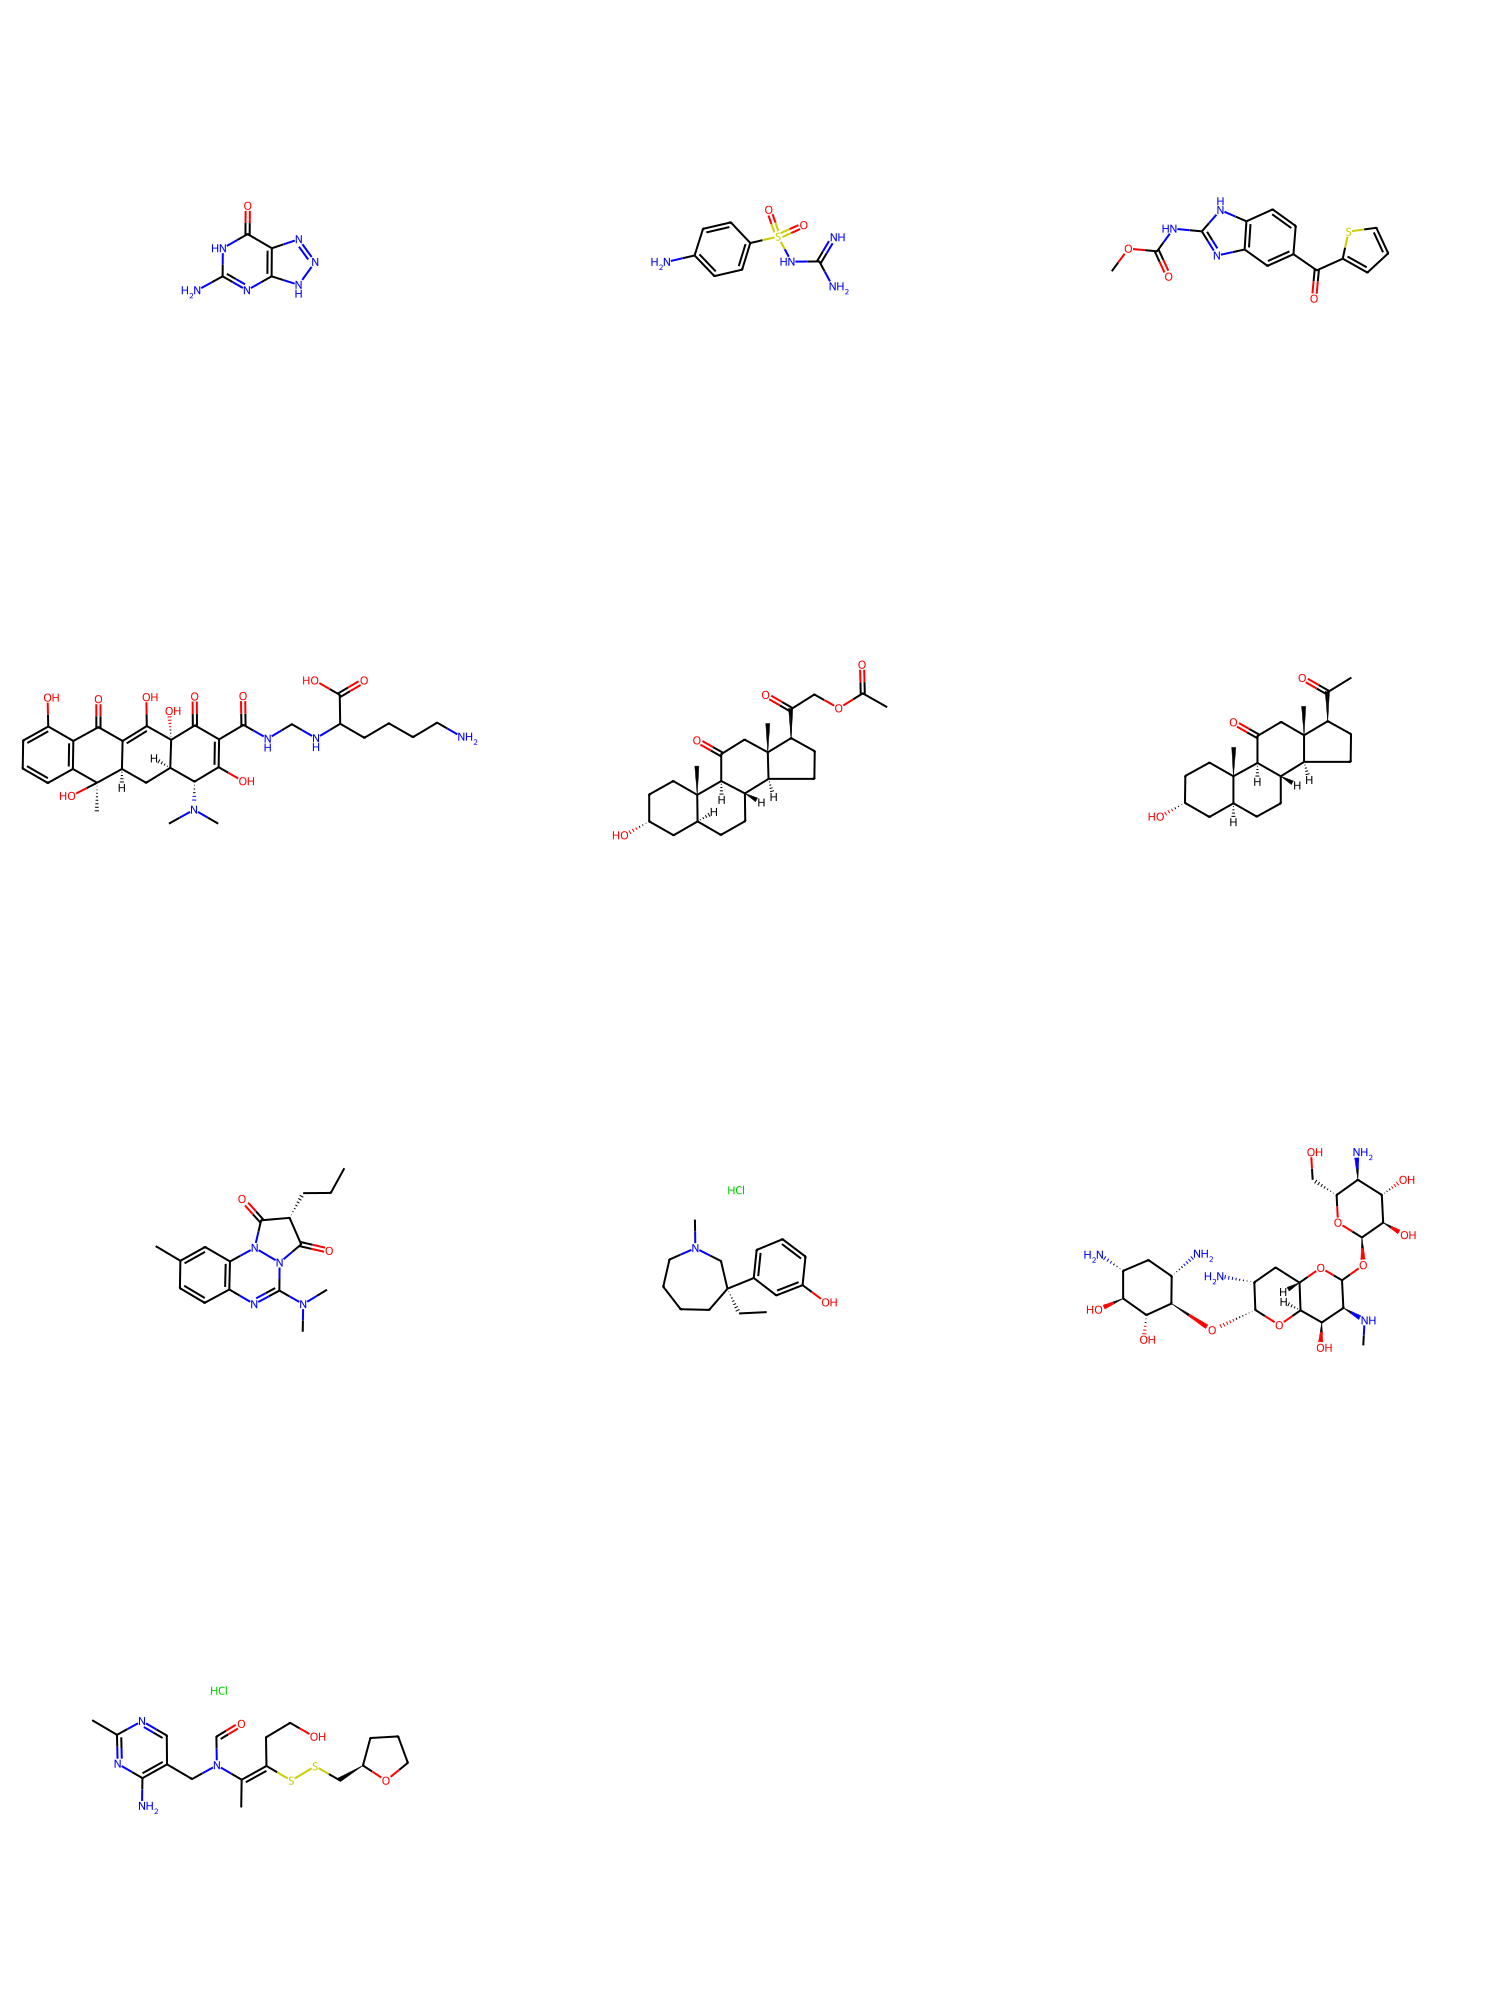

In [6]:
Draw.MolsToGridImage(new_df['Molecule'], molsPerRow=3, subImgSize=(500, 500))

####  5. Sort compounds by Launched date:

In [7]:
#sort compounds by launched date
new_df.sort_values(by="Launched date", ascending=False)

,chemical name,name IUPAC,Launched date,FDA approved,code ATC,solubility,Additional info type,Additional info detail,blood brain barrier,administration,...,SMILES,Molecule,Molwt,MolLogP,NumAromaticRings,HBA,HBD,MaxPartialCharge,MinPartialCharge,NumRotatableBonds
4,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...",Phase I,,Not yet attributed,,,,,,...,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f20>,390.520,3.31740,0,5,1,0.302564,-0.457860,3
3,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,1992,,J01AA04,,Chemical classification (according ATC code),Tetracycline,,Oral,...,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94563c0>,602.641,-0.45420,1,12,9,0.320245,-0.509650,10
7,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,1983,,N02AX05,,Chemical classification (according ATC code),Opioid,,,...,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471120>,269.816,3.57750,1,2,1,0.115372,-0.507956,2
8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...",1980,,QJ01GB90,,"Veterinary use, Veterinary use, Veterinary use","Cattle, Rabbit, Swine",,Oral,...,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471190>,539.583,-6.94930,0,16,11,0.189171,-0.393609,6
6,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...",1970,,M01AX04,,Therapeutic classification (according ATC code),NSAID,,Oral,...,CCC[C@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471040>,300.362,2.06422,1,4,0,0.261007,-0.346837,2
0,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol",,,Not yet attributed,DMSO,Pharmacological tool,,,,...,Nc1nc2[nH]nnc2c(=O)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb94562e0>,152.117,-1.37660,2,5,3,0.281974,-0.369251,0
1,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,,,A07AB03,DMSO,Chemical classification (according ATC code),Sulfonamide,,Oral,...,N=C(N)NS(=O)(=O)c1ccc(N)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456350>,214.250,-0.55943,1,4,4,0.263641,-0.398728,2
2,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,,Not yet attributed,DMSO 10mg/mL,,,,,...,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9402cf0>,301.327,3.03370,3,5,2,0.413190,-0.452572,3
5,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...",,,N01AX05,,Therapeutic classification (according ATC code),General anesthetic,,,...,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9456f90>,332.484,3.77420,0,3,1,0.136897,-0.393120,1
9,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,,,Not yet attributed,,,,,,...,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,<rdkit.Chem.rdchem.Mol object at 0x7fdeb9471270>,435.015,2.92172,1,8,2,0.213710,-0.396010,10


####  6. Sort compounds by therapeutic class, and within each therapeutic class by molecular weight:

In [8]:
#first I listed the unique therapeutic class names:
new_df['therapeutic class name'].unique()

array(['Oncology', 'Infectiology, Metabolism', 'Metabolism',
       'Central Nervous System', 'Central Nervous System, Metabolism'],
      dtype=object)

Next, I created different data frames for each therapetic classes to use them separately for further analysis.

In [9]:
selected_onco = new_df[new_df['therapeutic class name'].str.contains('Oncology')]
df_onco = pd.DataFrame(selected_onco)

selected_meta = new_df[new_df['therapeutic class name'].str.contains('Metabolism')]
df_meta = pd.DataFrame(selected_meta)

selected_infec = new_df[new_df['therapeutic class name'].str.contains('Infectiology')]
df_infec = pd.DataFrame(selected_infec)

selected_cns = new_df[new_df['therapeutic class name'].str.contains('Central Nervous System')]
df_cns = pd.DataFrame(selected_cns)

In [10]:
#sort compounds by molecular weight for each therapeutic class
df_onco_sorted = df_onco.sort_values(by="Molwt", ascending=False)
df_onco_sorted[['chemical name','SMILES', 'Molwt', 'therapeutic class name']]

,chemical name,SMILES,Molwt,therapeutic class name
2,Nocodazole,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,301.327,Oncology
0,Azaguanine-8,Nc1nc2[nH]nnc2c(=O)[nH]1,152.117,Oncology


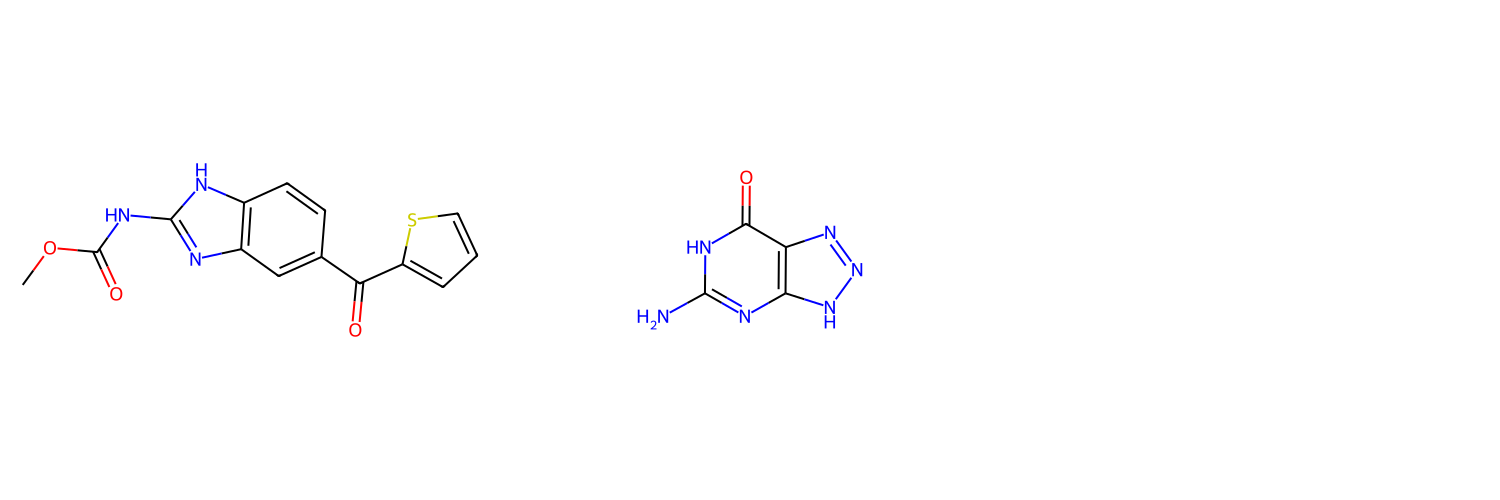

In [11]:
Draw.MolsToGridImage(df_onco_sorted['Molecule'], molsPerRow=3, subImgSize=(500, 500))

In [12]:
df_meta_sorted = df_meta.sort_values(by="Molwt", ascending=False)
df_meta_sorted[['chemical name','SMILES', 'Molwt', 'therapeutic class name']]

,chemical name,SMILES,Molwt,therapeutic class name
3,Lymecycline,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,602.641,Metabolism
8,Apramycin,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,539.583,"Infectiology, Metabolism"
9,Fursultiamine Hydrochloride,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,435.015,Metabolism
6,Azapropazone,CCC[C@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,300.362,"Central Nervous System, Metabolism"
1,Sulfaguanidine,N=C(N)NS(=O)(=O)c1ccc(N)cc1,214.250,"Infectiology, Metabolism"


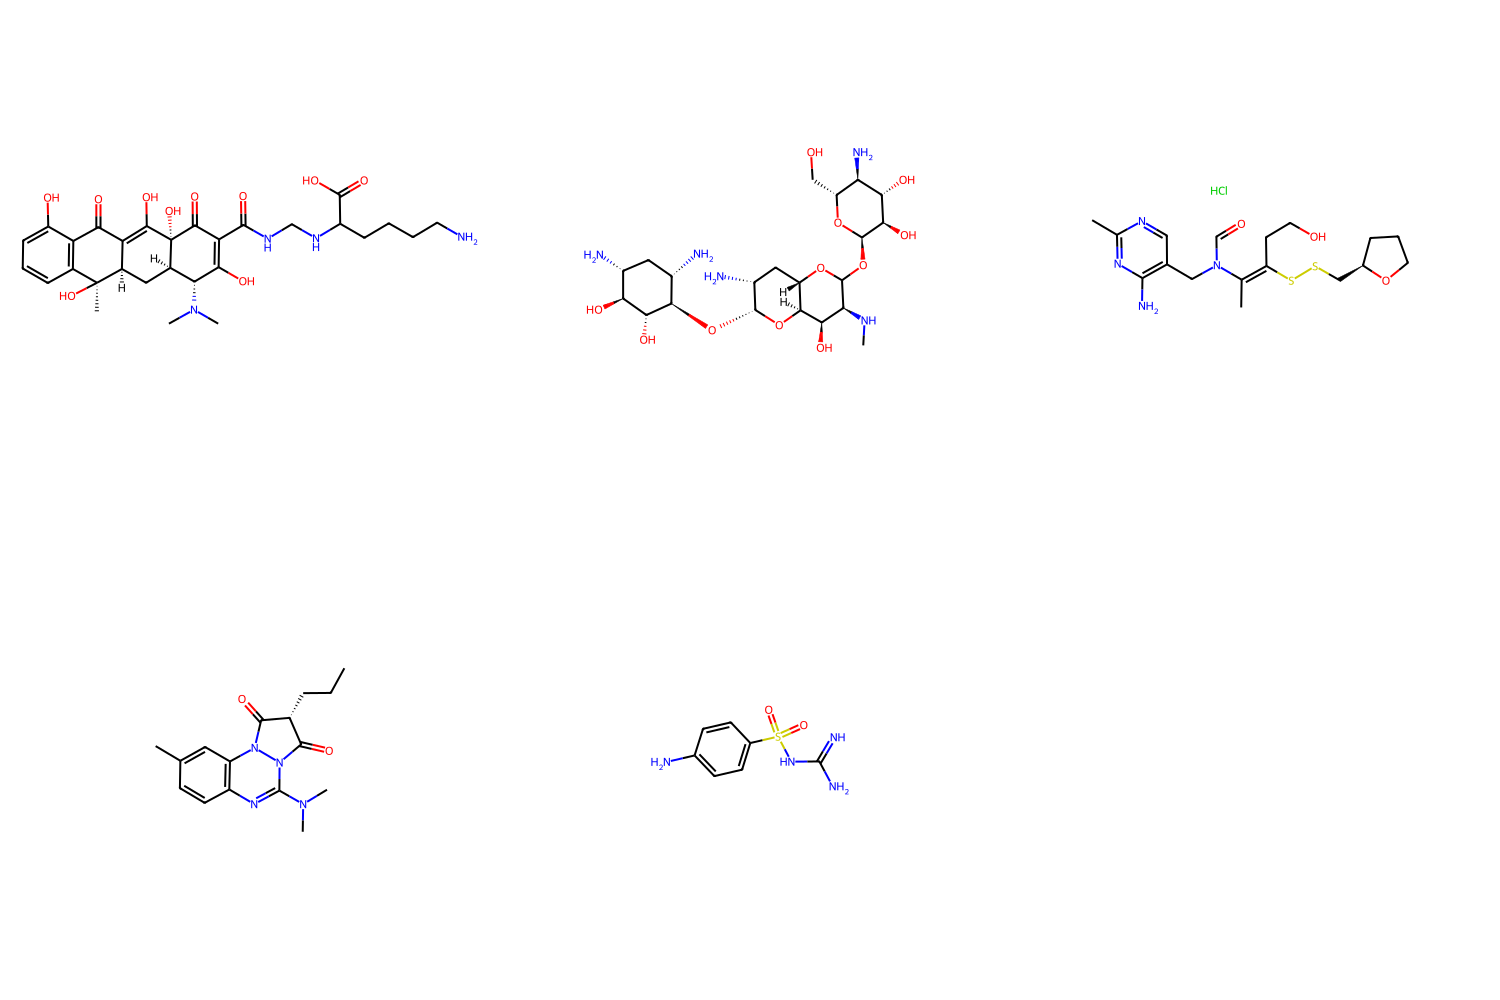

In [13]:
Draw.MolsToGridImage(df_meta_sorted['Molecule'], molsPerRow=3, subImgSize=(500, 500))

In [14]:
df_infec_sorted = df_infec.sort_values(by="Molwt", ascending=False)
df_infec_sorted[['chemical name','SMILES', 'Molwt', 'therapeutic class name']]

,chemical name,SMILES,Molwt,therapeutic class name
8,Apramycin,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,539.583,"Infectiology, Metabolism"
1,Sulfaguanidine,N=C(N)NS(=O)(=O)c1ccc(N)cc1,214.250,"Infectiology, Metabolism"


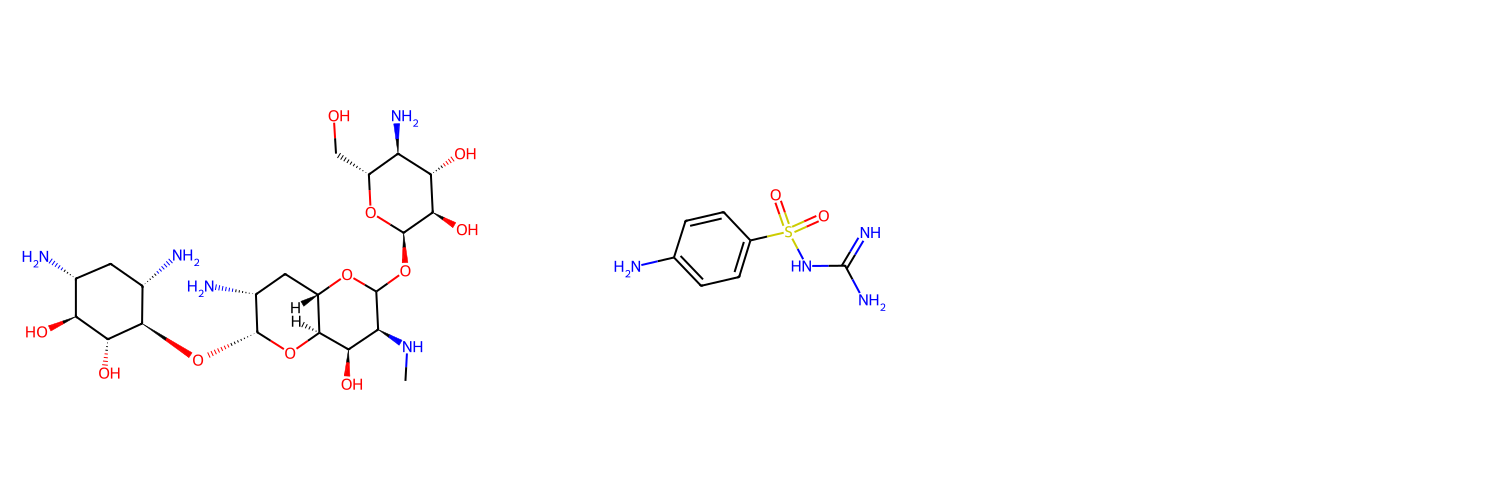

In [15]:
Draw.MolsToGridImage(df_infec_sorted['Molecule'], molsPerRow=3, subImgSize=(500, 500))

In [16]:
df_cns_sorted = df_cns.sort_values(by="Molwt", ascending=False)
df_cns_sorted[['chemical name','SMILES', 'Molwt', 'therapeutic class name']]

,chemical name,SMILES,Molwt,therapeutic class name
4,Alfadolone acetate,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,390.520,Central Nervous System
5,Alfaxalone,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,332.484,Central Nervous System
6,Azapropazone,CCC[C@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,300.362,"Central Nervous System, Metabolism"
7,Meptazinol hydrochloride,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,269.816,Central Nervous System


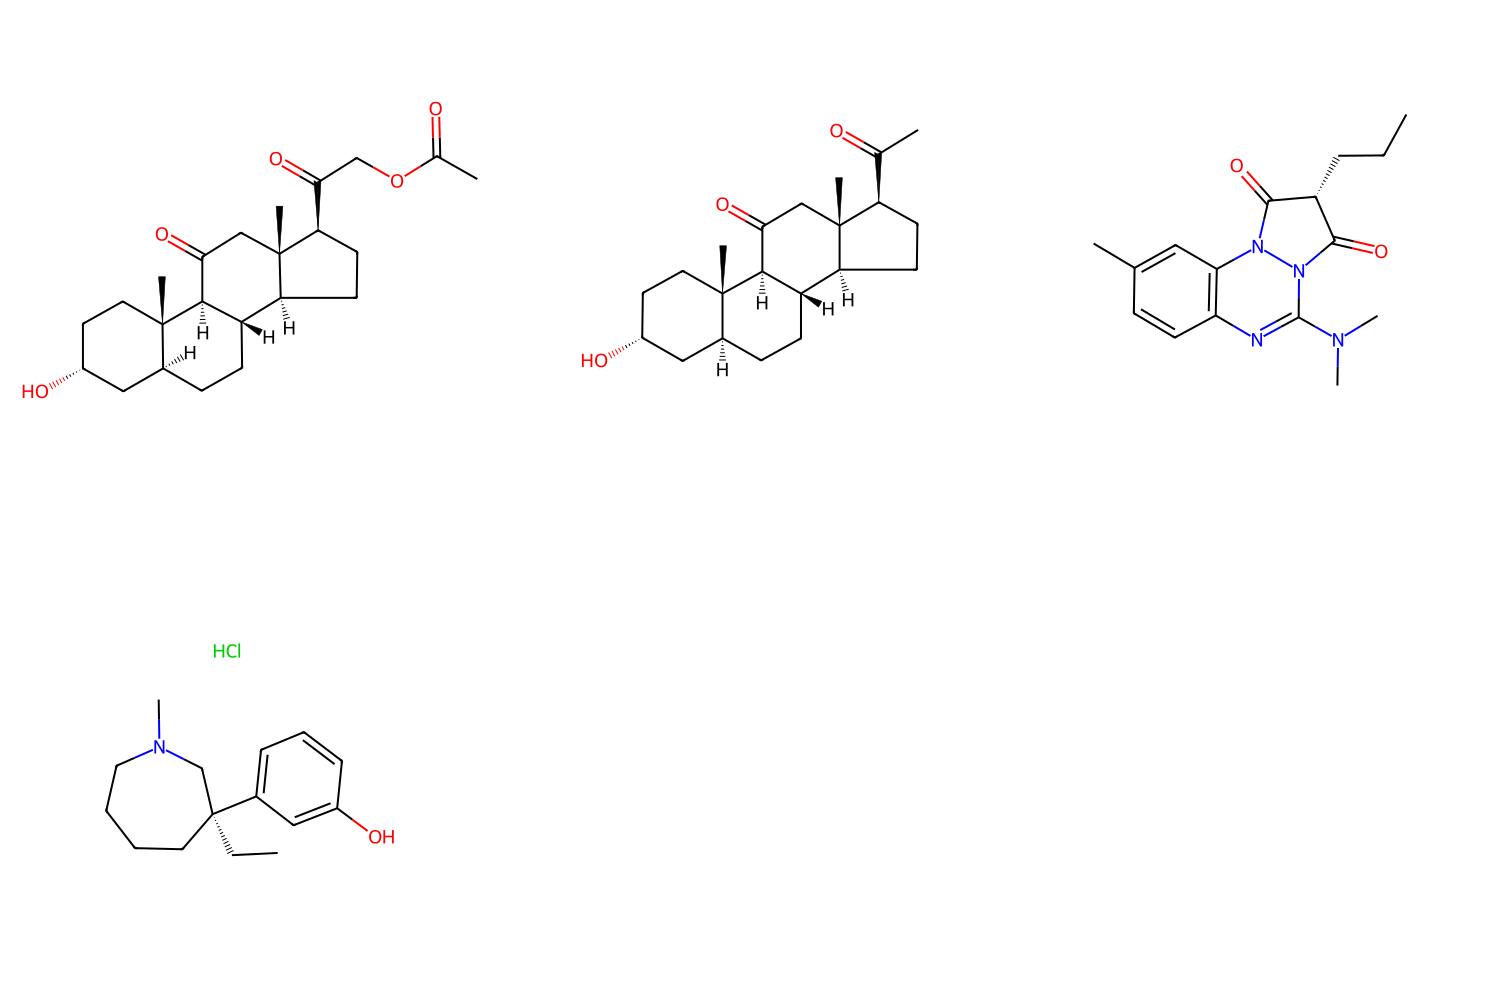

In [17]:
Draw.MolsToGridImage(df_cns_sorted['Molecule'], molsPerRow=3, subImgSize=(500, 500))

####  7. Something useful:

#### Meeko: Docking straight from SMILES string 

In [18]:
#use all the drugs as ligands to dock SARS-CoV-2 main protease
count=0
import meeko
import vina
from meeko import PDBQTMolecule
from meeko import RDKitMolCreate

for sim in new_df["SMILES"]:
    
    lig = rdkit.Chem.MolFromSmiles(sim)
    protonated_lig = rdkit.Chem.AddHs(lig)
    rdkit.Chem.AllChem.EmbedMolecule(protonated_lig)
    
    meeko_prep = meeko.MoleculePreparation()
    meeko_prep.prepare(protonated_lig)
    lig_pdbqt = meeko_prep.write_pdbqt_string()
    
    v = vina.Vina(sf_name='vina', verbosity=0)
    v.set_receptor('3CL_PRO.pdbqt')
    v.set_ligand_from_string(lig_pdbqt)
    
    v.compute_vina_maps(center=[-0.663, 0.367, -1.155], box_size=[70, 70, 70])
    v.dock(exhaustiveness=12, n_poses=5)
    v.write_poses(f'output_{count}_pd.pdbqt', n_poses=5, overwrite=True)
    
    count = count + 1